# 📥 Import libraries 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Clean dataset
For EDA scores, we only need to leave such columns as: group, name, total score, and possibly email. 
All other columns of the dataset are questions, where each row has a score for the answer. 
In this case, we don't need these statistics, so we'll just throw away these columns. 
The scores in the dataset are written in the format score / max score, but the max score is the same everywhere, so it needs to be converted to just score. 


Let's load the dataset and look at the columns it contains. 
As you can see below, the required columns are at the beginning, and all the other columns (test questions) are at the end. 

In [77]:
df = pd.read_csv('mkrop2.csv')
df.columns


Index(['Timestamp', 'Username', 'Total score', 'Введіть прізвище та ім'я',
       'Введіть прізвище та ім'я [Score]',
       'Введіть прізвище та ім'я [Feedback]', 'Введіть номер групи',
       'Введіть номер групи [Score]', 'Введіть номер групи [Feedback]',
       ' Якщо у списку ініціалізації масиву з елементів простих типів , елементів менше, ніж оголошений розмір масиву, наприклад: int v[5] = {1, 2, 3};  То:',
       ...
       'Функція це... [Score]', 'Функція це... [Feedback]', 'Unnamed: 162',
       'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166',
       'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169'],
      dtype='object', length=170)

To verify this, let's look at 5 random records from the dataset.

In [78]:
df.sample(3)

,Timestamp,Username,Total score,Введіть прізвище та ім'я,Введіть прізвище та ім'я [Score],Введіть прізвище та ім'я [Feedback],Введіть номер групи,Введіть номер групи [Score],Введіть номер групи [Feedback],"Якщо у списку ініціалізації масиву з елементів простих типів , елементів менше, ніж оголошений розмір масиву, наприклад: int v[5] = {1, 2, 3}; То:",...,Функція це... [Score],Функція це... [Feedback],Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169
25,2021/12/21 10:48:59 AM GMT+2,kovalenkokateryna25@gmail.com,8.00 / 50,NaN,NaN,NaN,NaN,NaN,NaN,Всім іншим елементам надається значення 0,...,NaN,NaN,Коваленко Катерина,ІС-13,Width nInt 2147483647 Width nCharBit 8,NaN,NaN,NaN,NaN,NaN
69,2021/12/21 10:55:47 AM GMT+2,vlad2004bil@gmail.com,7.00 / 50,NaN,NaN,NaN,NaN,NaN,NaN,Значення інших елементів залежить від використ...,...,NaN,NaN,Білоконь Владислав,Іс-13,Width nInt 2147483647 Width nCharBit 8,NaN,NaN,NaN,NaN,NaN
295,2023/12/13 11:35:56 AM GMT+2,tanchuk.sofiia@lll.kpi.ua,40.00 / 50,Танчук Софія,-- / 0,NaN,ІС-33,-- / 0,NaN,Значення інших елементів залежить від використ...,...,1.00 / 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see above, we have a lot of columns with NaN values that we don't need and can't recover. 
Also, not everywhere the group is correctly indicated, this also needs to be corrected

In [79]:
df = df[['Username', 'Total score', 'Введіть прізвище та ім\'я', 'Введіть номер групи']]
df.dropna(inplace=True)
df.rename(columns={'Введіть прізвище та ім\'я': 'Name', 'Введіть номер групи': 'Group', 'Username':'Email'}, inplace=True)
df['Total score'] = df['Total score'].str.replace(' / 50', '').astype(float)
df = df[df['Group'].isin(["ІС-34", "ІС-33", "ІС-32", "ІС-31"])]
# Replace Emails and Names because it's personal data 
df['Name'] = df['Name'].apply(lambda x: '***' + x[-4:])
df['Email'] = df['Email'].apply(lambda x: '***' + x[-14:])
df.head(5)


,Email,Total score,Name,Group
184,***tem@lll.kpi.ua,50.0,***ртем,ІС-34
185,***r.h@gmaiil.com,49.0,***Ігор,ІС-34
186,***dra@lll.kpi.ua,50.0,***ндра,ІС-34
187,***gor@lll.kpi.ua,48.0,***Єгор,ІС-34
189,***tro@lll.kpi.ua,50.0,***итро,ІС-32


And here's a piece of dataset with already cleaned data.
<br> What was done: <br>
- Only the columns 'Username', 'Total score', 'Enter first and last name', and 'Enter group number' were selected.
- For convenience, I renamed them to Name, Group, Email, respectively. 
- I converted Score to a simple number, without indicating the maximum score. 
- I also selected only 4 groups that I needed to analyze: IC-34, IC-33, IC-32, and IC-31. 

# 🧪 Exploratory Data Analysis
First of all, we are interested in how well the groups did, not how well individual students did. In terms of data cleaning, I selected all the necessary dataset columns.
Now let's compare the statistics by group. 

Here is barplot with the results of all groups. The graph legend shows the colors for each group. 

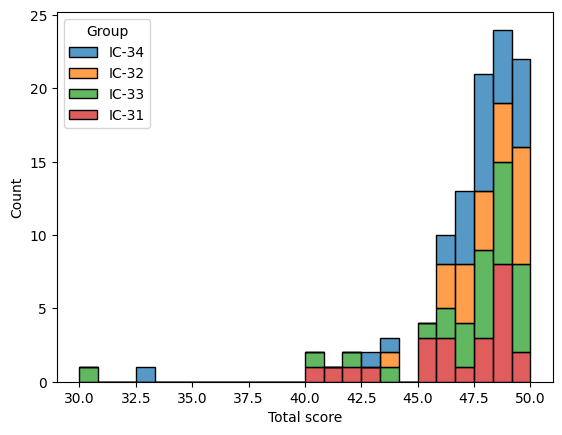

<Figure size 1520x560 with 0 Axes>

In [80]:
sns.histplot(data=df, x="Total score", hue="Group", multiple="stack")
plt.figure(figsize=(15.2, 5.6))
plt.show()

Now let's present these statistics in a slightly more understandable form: <br> histograms of the distribution of scores by the number of those who received them for each group

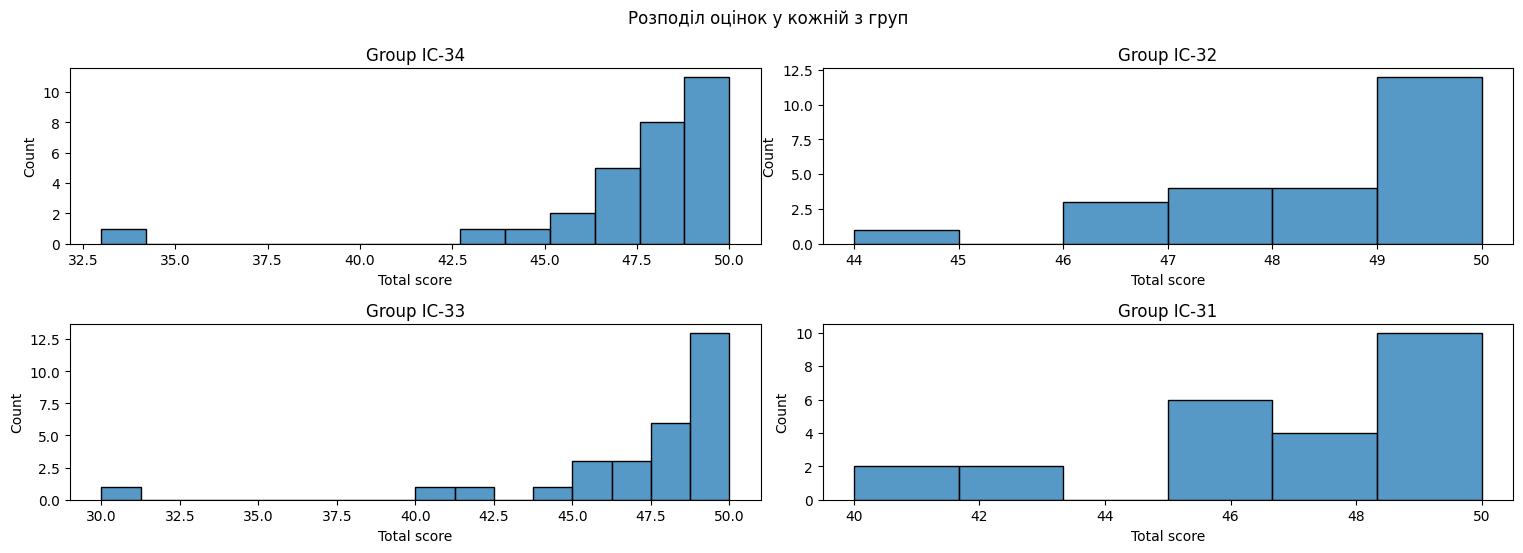

In [81]:
groups = df['Group'].unique()
fig, axs = plt.subplots(2, 2, figsize=(15.2, 5.6))

for i, group in enumerate(groups):
    row = i // 2
    col = i % 2
    sns.histplot(df[df['Group'] == group]['Total score'], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'Group {group}')

fig.suptitle('Розподіл оцінок у кожній з груп')
plt.tight_layout()
plt.show()

I'm also interested in how many students didn't get the maximum marks. <br> To do this, let's count how many students in each group wrote MKR for less than 47 points. 

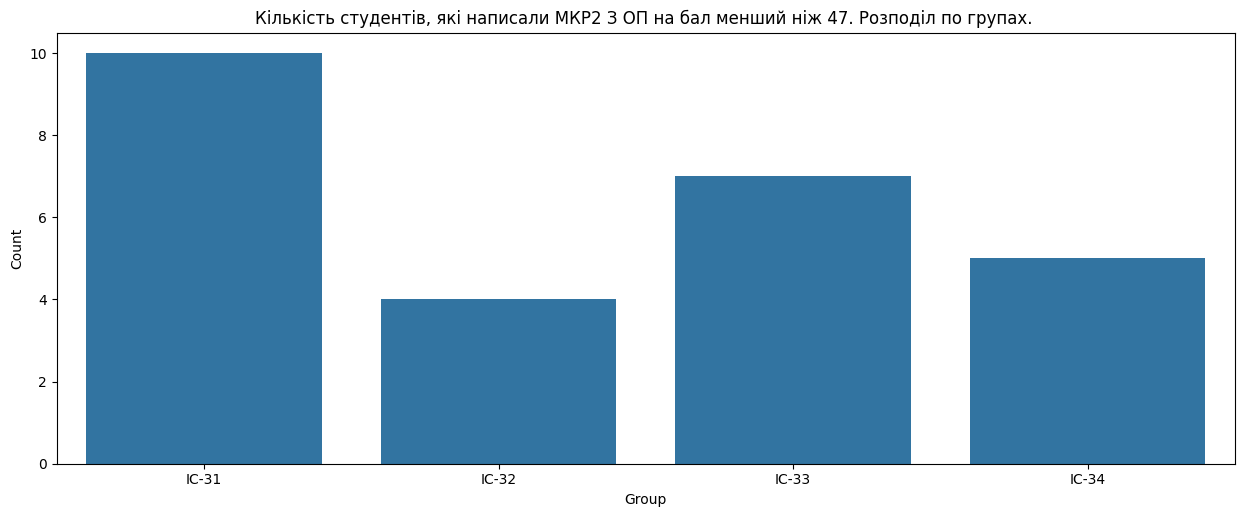

In [82]:
count = df[df['Total score'] < 47].groupby('Group').size()

plt.figure(figsize=(15.2, 5.6))
sns.barplot(x=count.index, y=count.values)
plt.title('Кількість студентів, які написали МКР2 З ОП на бал менший ніж 47. Розподіл по групах. ')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

And now for the most interesting part: the top 10% of the worst performers from all groups.

In [83]:
cutoff = df['Total score'].quantile(0.1)
worst_scores = df[df['Total score'] <= cutoff]
worst_scores = worst_scores.sort_values('Total score')
worst_scores[['Name', 'Group', 'Total score']]

,Name,Group,Total score
236,***омир,ІС-33,30.0
298,***нило,ІС-34,33.0
250,***дан,ІС-31,40.0
295,***офія,ІС-33,40.0
271,***рина,ІС-31,41.0
191,***айло,ІС-33,42.0
296,***Анна,ІС-31,42.0
199,***кита,ІС-31,43.0
226,***слав,ІС-34,43.0
219,***ирил,ІС-32,44.0


I will also show a less important rating. The top 10% best

In [84]:
cutoff = df['Total score'].quantile(0.95)
best_scores = df[df['Total score'] >= cutoff]
best_scores = best_scores.sort_values('Total score', ascending=False)
best_scores[['Name', 'Group', 'Total score']]

,Name,Group,Total score
184,***ртем,ІС-34,50.0
186,***ндра,ІС-34,50.0
289,***Тіна,ІС-32,50.0
287,***слав,ІС-34,50.0
286,***ніка,ІС-33,50.0
282,***азар,ІС-33,50.0
280,***енис,ІС-34,50.0
259,***ртем,ІС-31,50.0
256,***вара,ІС-33,50.0
255,***енія,ІС-32,50.0


And now let's move on to the groups and evaluate how each group did as a whole!

To begin with, we need to understand what kind of sample we have, namely how many people from each group wrote the MKR. <br> The statistics are below.

In [85]:
group_counts = df.groupby('Group').size()
print(group_counts)

Group
ІС-31    24
ІС-32    24
ІС-33    29
ІС-34    29
dtype: int64


Now let's summarize the number of points per group.
<br>It is important to understand that only 24 people from the two groups wrote MKR. 
<br> Therefore, we can actually compare them only two by two (24-24 and 29-29) 
<br> And to summarize: 
- IC-32 did better than IC-31
- IC-34 did better than IC-33

In [86]:
group_respondent_totals = df.groupby(['Group'])['Total score'].sum()
print(group_respondent_totals)

Group
ІС-31    1122.0
ІС-32    1158.0
ІС-33    1365.0
ІС-34    1376.0
Name: Total score, dtype: float64


Finally, let's compare the average scores of each group. This is the best metric to help us determine the winner! 

In [87]:
group_averages = df.groupby('Group')['Total score'].mean()
group_averages = group_averages.sort_values(ascending=False)

print(group_averages)

Group
ІС-32    48.250000
ІС-34    47.448276
ІС-33    47.068966
ІС-31    46.750000
Name: Total score, dtype: float64


The winner is the IS-32, followed by the IC-34. 

# Afterword 

Well, that's it. <br> If you were interested, you can buy me a coffee) 
<br>Monobank: `4441111130069218`
<br> EDA by Ihor Kolosov, also known as Sofa ( Софа ), Akiyama
<br> My contacts:
- [Telegram](https://t.me/akiyama_kiyoshi)
- [Github](https://github.com/Ak1yamaKiyoshi)
- [LinkedIn](https://www.linkedin.com/in/ihor-kolosov-52b98223a/)